In [2]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
%matplotlib inline

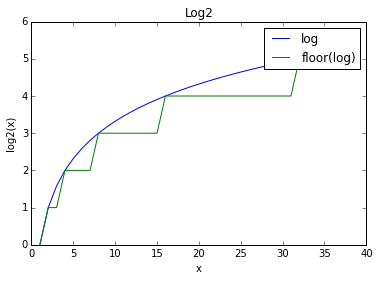

In [3]:
N = 40
x = range(1,N)
plt.plot(x, [m.log2(xx) for xx in x], label='log')
plt.plot(x, [m.floor(m.log2(xx)) for xx in x],label='floor(log)')
plt.title('Log2')
plt.xlabel('x')
plt.ylabel('log2(x)')
plt.legend()
plt.show()

In [89]:
class BinaryHeap:
    def __init__(self, data, dbg=False):
        self.debug = dbg
        self.data = data
        self.heap_size = len(data)
        
    def parent(self, ix, data=None):
        data = self.get_data(data)
        return data[int(m.floor(ix/2.))]
    
    def left_index(self, ix):
        return int(2*ix+1)
    def left_child(self, ix, data=None):
        data = self.get_data(data)
        return data[self.left_index(ix)]
    
    def right_index(self, ix):
        return int(2*ix+2)
    def right_child(self, ix, data=None):
        data = self.get_data(data)
        return data[self.right_index(ix)]
    
    def current(self, ix, data=None):
        data = self.get_data(data)
        return data[ix]
    
    def get_data(self, data=None):
        return self.data if data is None else data
    
    def max_heapify(self, ix, data=None):
        data  = self.get_data(data)
        ix_left  = self.left_index(ix)
        ix_right = self.right_index(ix)
        if ix_left<self.heap_size and self.left_child(ix) > self.current(ix):
            print('[cs: 1]',end='') if self.debug else 1
            largest = ix_left
        else:
            print('[cs: 2]',end='') if self.debug else 1
            largest = ix
        if ix_right<self.heap_size and self.right_child(ix) > self.current(largest):
            print('[cs: 3]',end='') if self.debug else 1
            largest = ix_right
        else:
            print(' '*7,end='')
        if self.debug:
            print(' ix: {0}, (l,r): ({1},{2}), lg: {3}'.format(ix, ix_left, ix_right, largest),end='') 
            print(', left:{0}'.format(self.left_child(ix)),end='') if ix_left<self.heap_size else 1
            print(', right:{0}'.format(self.right_child(ix)),end='') if ix_right<self.heap_size else 1
            print('')
        else: 1
        if largest != ix:
            data[ix], data[largest] = data[largest], data[ix]
            self.max_heapify(largest, data)
            
    def build_max_heap(self, data=None):
        data = self.get_data(data)
        half_length = int(m.floor(len(data)/2.))+1
        [self.max_heapify(ix) for ix in reversed(range(half_length))]
        
    def heap_sort(self, data=None):
        data = self.get_data(data)
        self.build_max_heap(data)
        for ix in reversed(range(1,len(data))):
            data[ix], data[0] = data[0], data[ix]
            self.heap_size -= 1
            self.max_heapify(0)
        

In [91]:
a = [16, 4, 10, 14, 7, 9, 20, 3, 2, 8, 1]
bh = BinaryHeap(a, dbg=True)
half_length = int(m.floor(len(a)/2.))
print(bh.data)
bh.heap_sort()
print(bh.data)

[16, 4, 10, 14, 7, 9, 20, 3, 2, 8, 1]
[cs: 2]        ix: 5, (l,r): (11,12), lg: 5
[cs: 1]        ix: 4, (l,r): (9,10), lg: 9, left:8, right:1
[cs: 2]        ix: 9, (l,r): (19,20), lg: 9
[cs: 2]        ix: 3, (l,r): (7,8), lg: 3, left:3, right:2
[cs: 2][cs: 3] ix: 2, (l,r): (5,6), lg: 6, left:9, right:20
[cs: 2]        ix: 6, (l,r): (13,14), lg: 6
[cs: 1]        ix: 1, (l,r): (3,4), lg: 3, left:14, right:8
[cs: 2]        ix: 3, (l,r): (7,8), lg: 3, left:3, right:2
[cs: 2][cs: 3] ix: 0, (l,r): (1,2), lg: 2, left:14, right:20
[cs: 2]        ix: 2, (l,r): (5,6), lg: 2, left:9, right:10
[cs: 1][cs: 3] ix: 0, (l,r): (1,2), lg: 2, left:14, right:16
[cs: 1][cs: 3] ix: 2, (l,r): (5,6), lg: 6, left:9, right:10
[cs: 2]        ix: 6, (l,r): (13,14), lg: 6
[cs: 1]        ix: 0, (l,r): (1,2), lg: 1, left:14, right:10
[cs: 2][cs: 3] ix: 1, (l,r): (3,4), lg: 4, left:4, right:8
[cs: 2]        ix: 4, (l,r): (9,10), lg: 4
[cs: 1][cs: 3] ix: 0, (l,r): (1,2), lg: 2, left:8, right:10
[cs: 1]        ix: 2, (